![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [208]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!

In [209]:
## 1. Reading in and exploring the dataset

df = pd.read_csv("car_insurance.csv")
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [211]:
credit_score_null = df["credit_score"].isnull().sum()
annual_mileage_null = df["annual_mileage"].isnull().sum()

print(credit_score_null)
print(annual_mileage_null)

982
957


In [212]:
outcome_counts = df["outcome"].value_counts()
outcome_counts

0.0    6867
1.0    3133
Name: outcome, dtype: int64

In [213]:
outcome_counts = df["outcome"].value_counts(normalize=True)
outcome_counts

0.0    0.6867
1.0    0.3133
Name: outcome, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

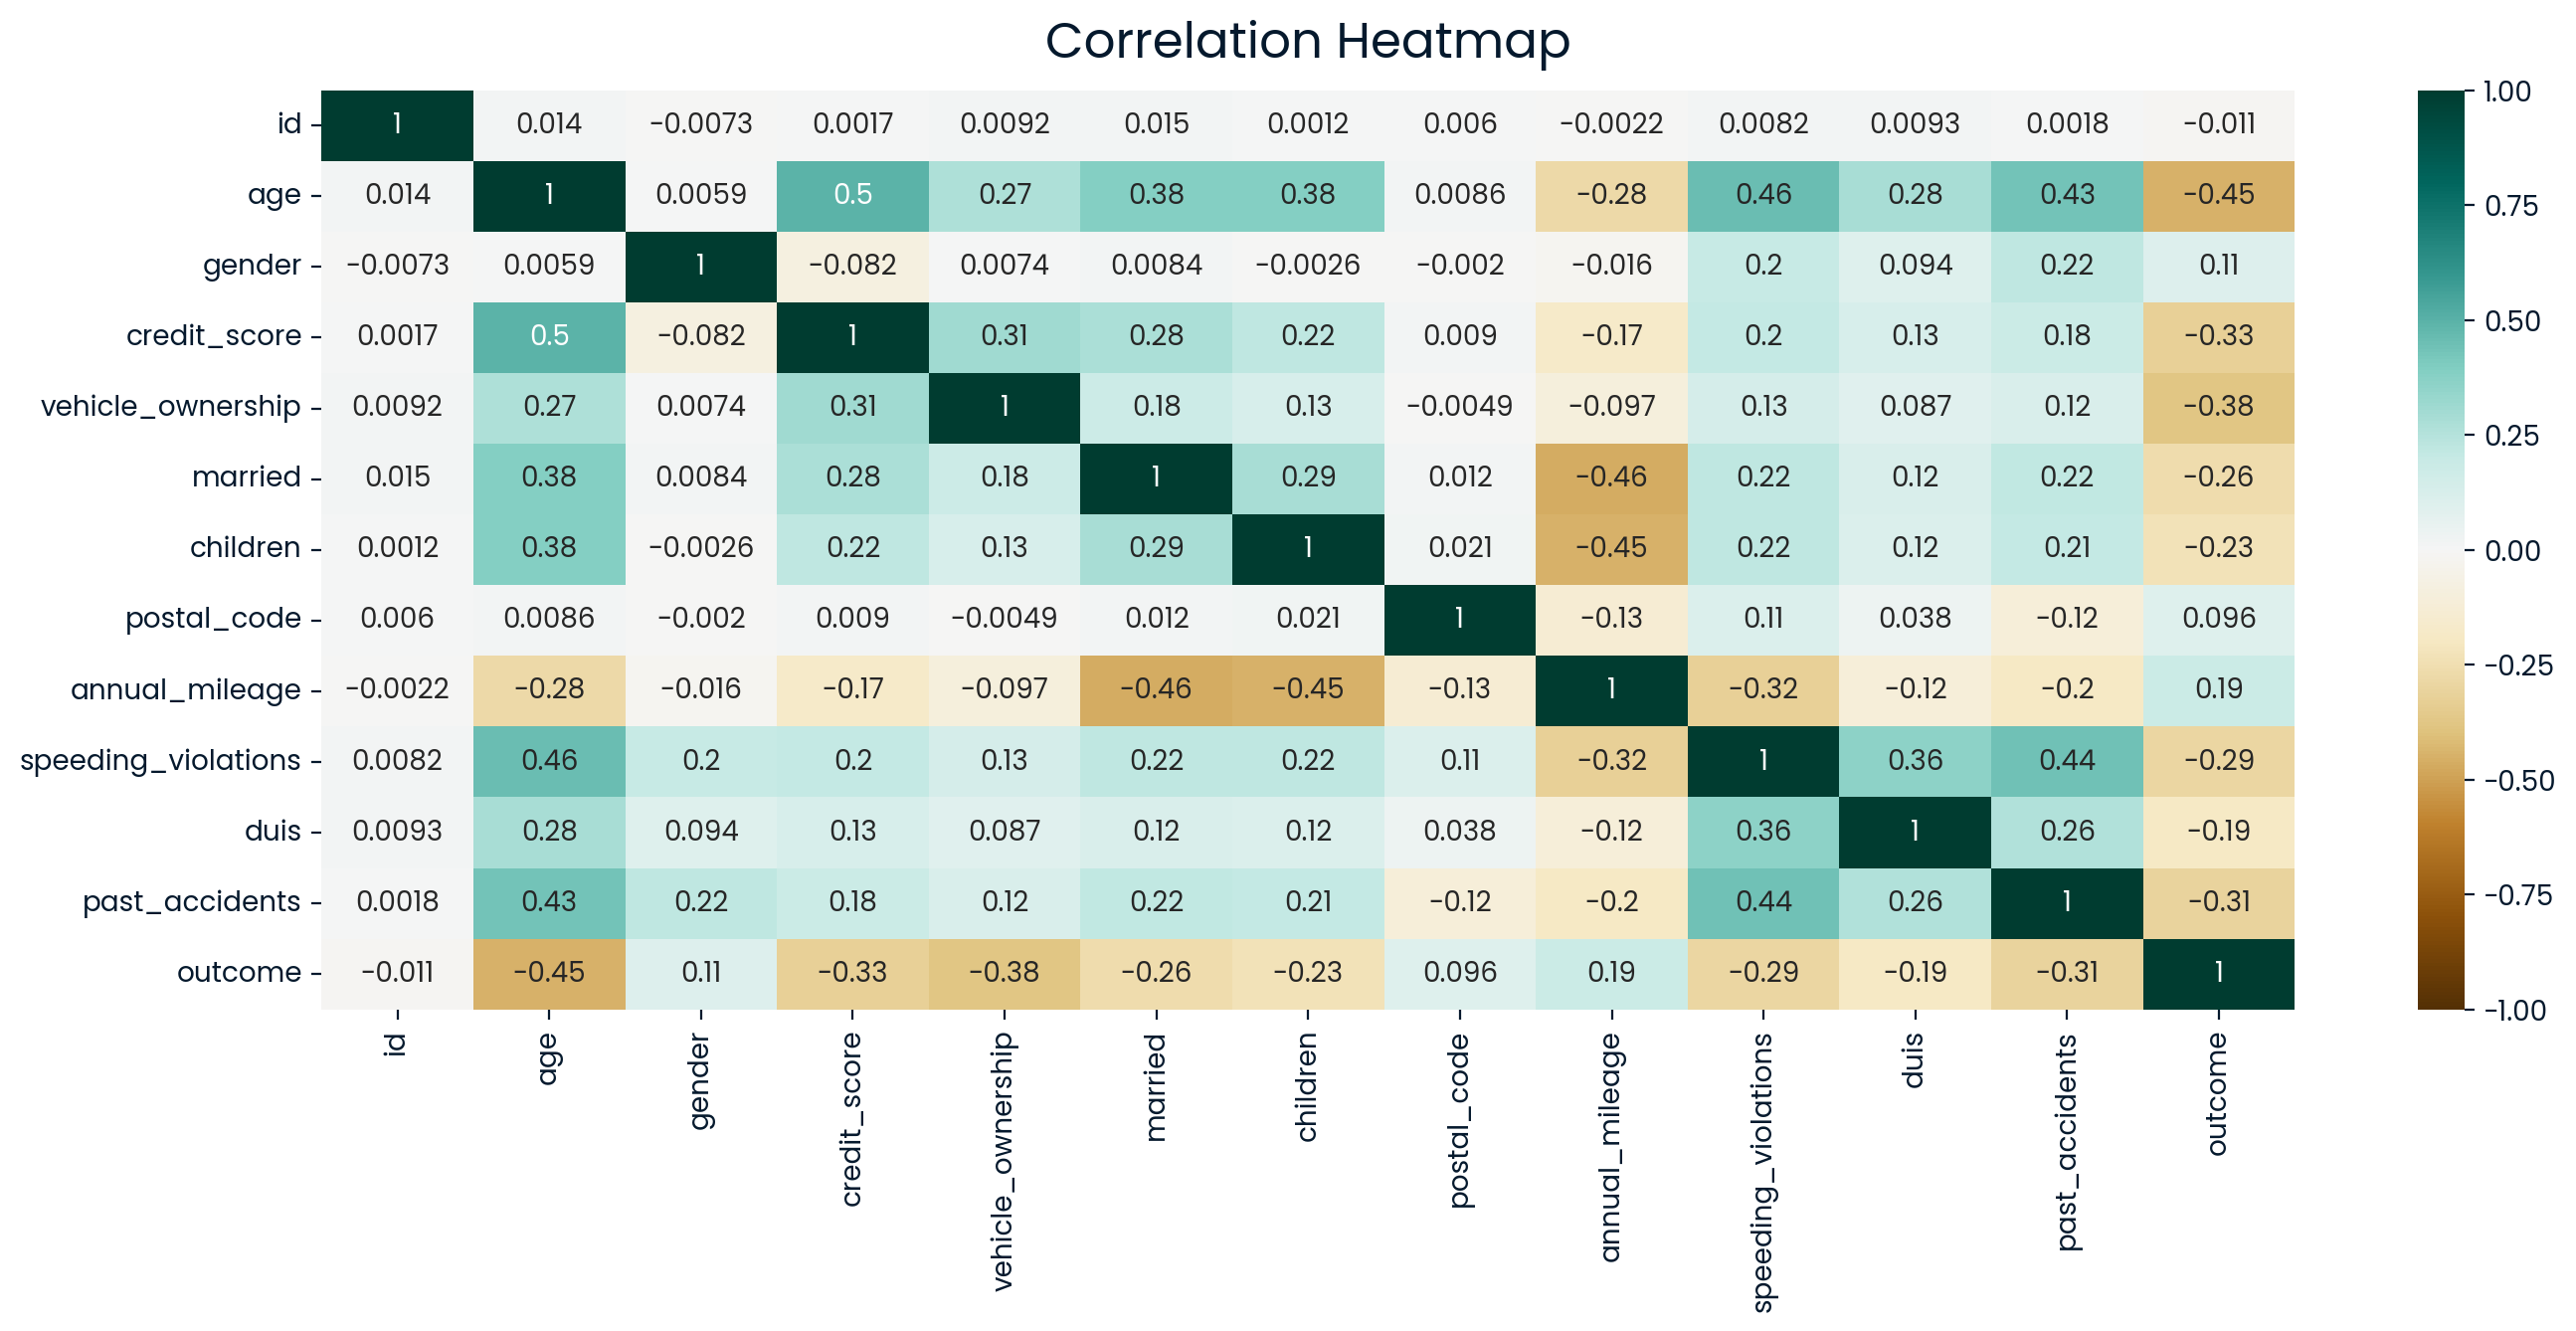

In [214]:
## 2. Finding correlations

import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(16, 6)) 
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

<AxesSubplot: xlabel='age', ylabel='outcome'>

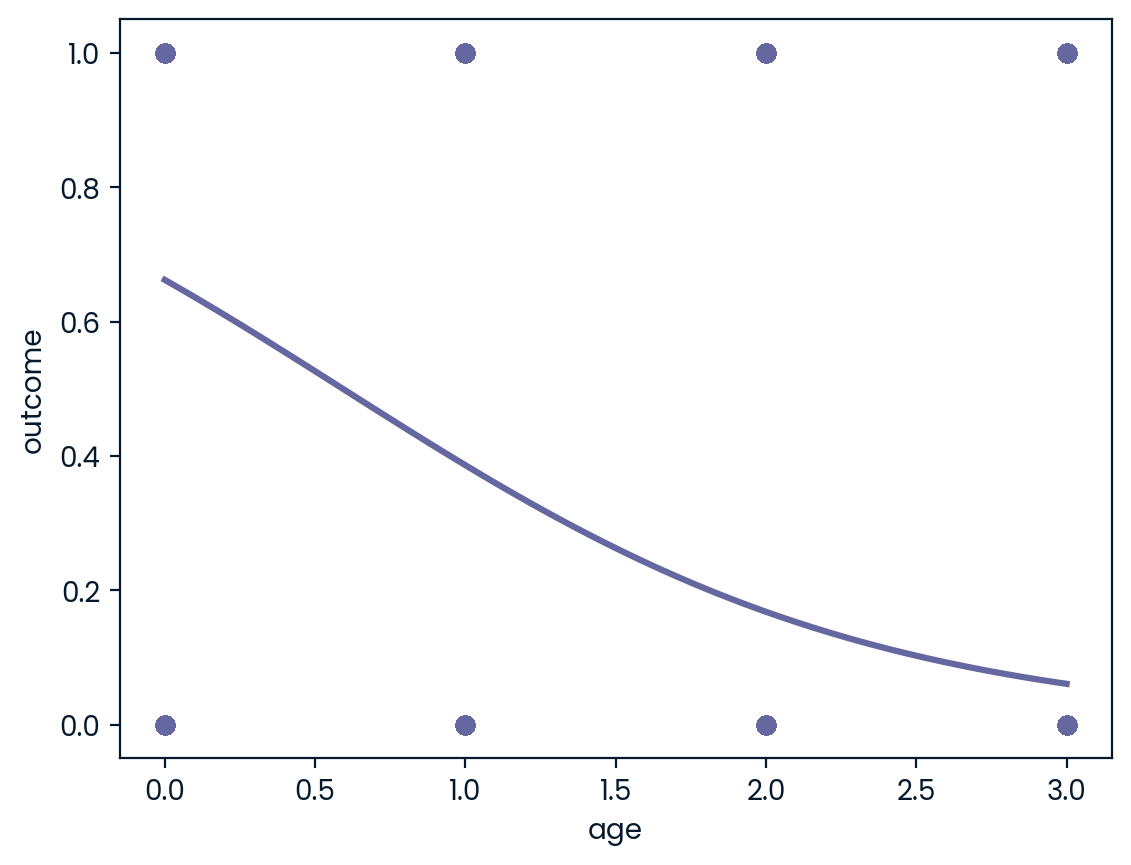

In [215]:
sns.regplot(x="age", y="outcome", data=df, ci=None, logistic=True)

In [216]:
## 3. Making predictions with age

from statsmodels.formula.api import logit
outcome_vs_age = logit("outcome ~ age",data=df).fit()
outcome_vs_age.params

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6


Intercept    0.673040
age         -1.135579
dtype: float64

In [217]:
explanatory_data = pd.DataFrame({"age": np.arange(0, 4, 1)})
prediction_data = explanatory_data.assign(outcome=outcome_vs_age.predict(explanatory_data))
prediction_data["most_likely_outcome"] = np.round(prediction_data["outcome"])
print(prediction_data)

   age   outcome  most_likely_outcome
0    0  0.662184                  1.0
1    1  0.386384                  0.0
2    2  0.168245                  0.0
3    3  0.061014                  0.0


In [218]:
conf_matrix = outcome_vs_age.pred_table()
print(conf_matrix)

[[6299.  568.]
 [1685. 1448.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6832835820895523, 0.914238108300713),
  ('0', '1'): (0.0,
   0.9175603674369256,
   0.6832835820895523,
   0.08243963256307435),
  ('1', '0'): (0.6882587064676617,
   0.0,
   0.31174129353233837,
   0.5360363847288483),
  ('1', '1'): (0.6882587064676617,
   0.5393586438650608,
   0.31174129353233837,
   0.46064135613493906)})

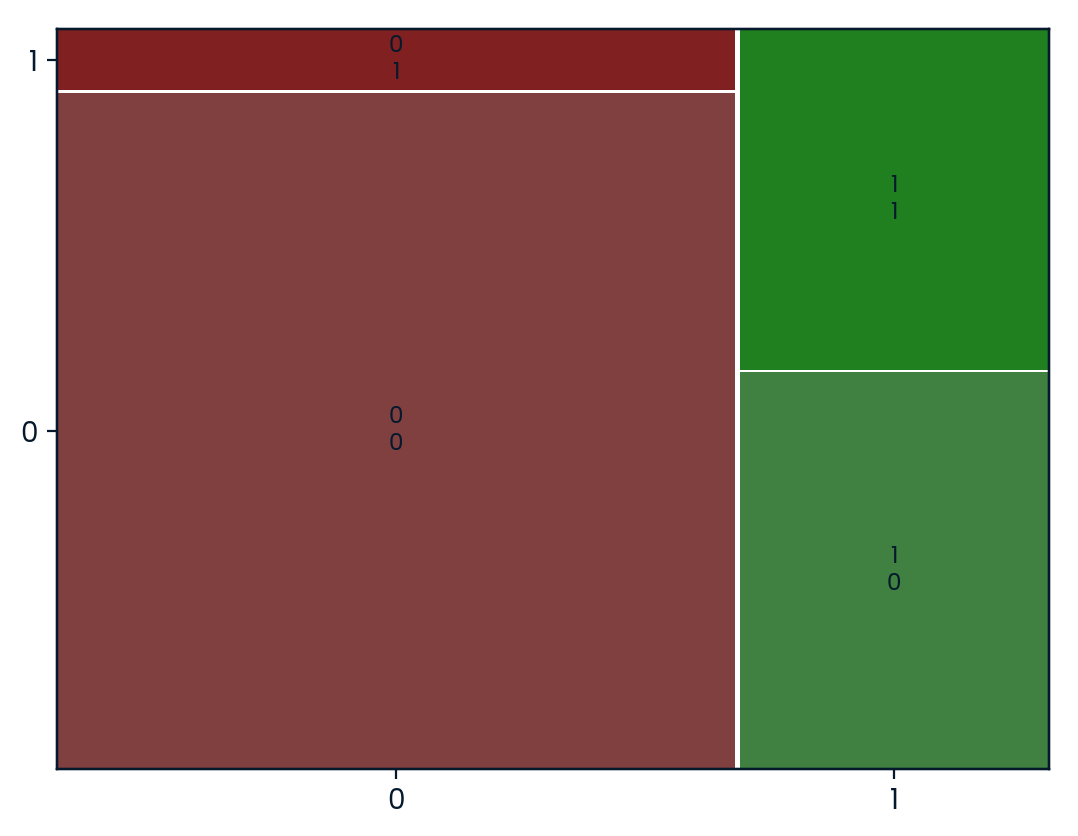

In [219]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

In [220]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

In [221]:
acc = (TN + TP) / (TN + TP + FN + FP)
print(acc)

0.7747


In [222]:
## 4. Determine the best_feature with accuracy

df_cleaned = df.iloc[:,1:18]
df_cleaned.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [223]:
import statsmodels.api as sm

def get_fit(df_cleaned):
    for column in df_cleaned.columns:
        formula = f"outcome ~ {column}"
        model = sm.Logit.from_formula(formula, data=df_cleaned).fit()
        print(f"outcome_vs_{column}:", model.params)

get_fit(df_cleaned)


Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
outcome_vs_age: Intercept    0.673040
age         -1.135579
dtype: float64
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
outcome_vs_gender: Intercept   -1.026966
gender       0.465146
dtype: float64
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
outcome_vs_driving_experience: Intercept                       0.523840
driving_experience[T.10-19y]   -1.684447
driving_experience[T.20-29y]   -3.438382
driving_experience[T.30y+]     -4.467362
dtype: float64
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
outcome_vs_education: Intercept                 -0.738601
education[T.none]          0.624640
education[T.university]   -0.494952
dtype: float64
Optimization terminated successfully.
         Current function value: 0.531499
    

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



         Current function value: 0.000000
         Iterations: 35
outcome_vs_outcome: Intercept   -16.103999
outcome      36.469359
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [224]:
import statsmodels.api as sm
import pandas as pd

def get_conf_matrix(df_cleaned):
    conf_matrices = {}
    for column in df_cleaned.columns:
        formula = f"outcome ~ {column}"
        model = sm.Logit.from_formula(formula, data=df_cleaned).fit()
        conf_matrix = model.pred_table()
        conf_matrices[column] = conf_matrix
        print(conf_matrix)
    return conf_matrices

conf_matrices = get_conf_matrix(df_cleaned)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
[[6299.  568.]
 [1685. 1448.]]
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
[[6867.    0.]
 [3133.    0.]]
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
[[5554. 1313.]
 [ 916. 2217.]]
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
[[6867.    0.]
 [3133.    0.]]
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
[[6239.  628.]
 [1947. 1186.]]
Optimization terminated successfully.
         Current function value: 0.567469
         Iterations 6
[[5650.  539.]
 [2106.  723.]]
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
[[5594. 1273.]
 [1376. 1757.]]
Optimization terminated successfully.
         Current function value

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [225]:
def elements_matrix(conf_matrices):
    elements_list = []
    for column, conf_matrix in conf_matrices.items():
        elements = {
            "column": column,
            "TN": conf_matrix[0, 0],
            "TP": conf_matrix[1, 1],
            "FN": conf_matrix[1, 0],
            "FP": conf_matrix[0, 1],
        }
        elements_list.append(elements)
    return pd.DataFrame(elements_list)

df_elements_matrix = elements_matrix(conf_matrices)
print(df_elements_matrix)

                 column      TN      TP      FN      FP
0                   age  6299.0  1448.0  1685.0   568.0
1                gender  6867.0     0.0  3133.0     0.0
2    driving_experience  5554.0  2217.0   916.0  1313.0
3             education  6867.0     0.0  3133.0     0.0
4                income  6239.0  1186.0  1947.0   628.0
5          credit_score  5650.0   723.0  2106.0   539.0
6     vehicle_ownership  5594.0  1757.0  1376.0  1273.0
7          vehicle_year  6867.0     0.0  3133.0     0.0
8               married  6867.0     0.0  3133.0     0.0
9              children  6867.0     0.0  3133.0     0.0
10          postal_code  6867.0     0.0  3133.0     0.0
11       annual_mileage  6167.0   103.0  2707.0    66.0
12         vehicle_type  6867.0     0.0  3133.0     0.0
13  speeding_violations  6867.0     0.0  3133.0     0.0
14                 duis  6867.0     0.0  3133.0     0.0
15       past_accidents  6867.0     0.0  3133.0     0.0
16              outcome  6867.0  3133.0     0.0 

In [226]:
## Calculate accuracy

df_elements_matrix["best_accuracy"] = (df_elements_matrix["TN"] + df_elements_matrix["TP"]) / (df_elements_matrix["TN"] + df_elements_matrix["TP"] + df_elements_matrix["FN"] + df_elements_matrix["FP"])

print(df_elements_matrix)

                 column      TN      TP      FN      FP  best_accuracy
0                   age  6299.0  1448.0  1685.0   568.0       0.774700
1                gender  6867.0     0.0  3133.0     0.0       0.686700
2    driving_experience  5554.0  2217.0   916.0  1313.0       0.777100
3             education  6867.0     0.0  3133.0     0.0       0.686700
4                income  6239.0  1186.0  1947.0   628.0       0.742500
5          credit_score  5650.0   723.0  2106.0   539.0       0.706698
6     vehicle_ownership  5594.0  1757.0  1376.0  1273.0       0.735100
7          vehicle_year  6867.0     0.0  3133.0     0.0       0.686700
8               married  6867.0     0.0  3133.0     0.0       0.686700
9              children  6867.0     0.0  3133.0     0.0       0.686700
10          postal_code  6867.0     0.0  3133.0     0.0       0.686700
11       annual_mileage  6167.0   103.0  2707.0    66.0       0.693354
12         vehicle_type  6867.0     0.0  3133.0     0.0       0.686700
13  sp

In [227]:
df_elements_matrix["best_feature"] = df_elements_matrix["column"]

In [228]:
df_elements_matrix_ordered = df_elements_matrix[["best_feature", "best_accuracy"]].sort_values("best_accuracy", ascending=False)
print(df_elements_matrix_ordered)

           best_feature  best_accuracy
16              outcome       1.000000
2    driving_experience       0.777100
0                   age       0.774700
4                income       0.742500
6     vehicle_ownership       0.735100
5          credit_score       0.706698
11       annual_mileage       0.693354
3             education       0.686700
7          vehicle_year       0.686700
1                gender       0.686700
9              children       0.686700
10          postal_code       0.686700
12         vehicle_type       0.686700
13  speeding_violations       0.686700
14                 duis       0.686700
15       past_accidents       0.686700
8               married       0.686700


In [229]:
best_feature_df = df_elements_matrix_ordered.iloc[[1]]
print(best_feature_df)

         best_feature  best_accuracy
2  driving_experience         0.7771
